In [1]:
from bing_image_downloader import downloader
import os
from PIL import Image
import numpy as np
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import random
import cv2

In [2]:
# num_image = 150

# for f in classes:
#     downloader.download(f, limit = num_image, output_dir='images')

In [3]:
data_dir = os.getcwd()+'/images'
file_folder = os.listdir(data_dir)

In [4]:
IMG_WIDTH=300
IMG_HEIGHT=300

# Function create a dataset which will be used in the marchine learning proccess
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in file_folder:
        files = os.listdir(os.path.join(data_dir, dir1))
        for f in files:
            try:
                image_path = data_dir+"/"+dir1+"/"+f
               
                if os.path.splitext(image_path)[1] != '.jpg': # If extension are no .jgp
                        image = Image.open(image_path)
                        image = image.convert('RGB')
                        image.save(os.path.splitext(image_path)[0]+".jpg") # Converto to .jpg
                        os.remove(image_path) # Delete original file
                    
                image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Transform BGR to RGB
                image=cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT),interpolation = cv2.INTER_AREA)
                image=np.array(image)
                image = image.astype('float32')
                image /= 255 
                img_data_array.append(image)
                class_name.append(dir1.replace(' fruit',''))
            except:
                print('Issue with image', image_path)
                os.remove(image_path)
                pass
    return img_data_array, class_name

# extract the image array and class name
img_data, class_data = create_dataset(img_folder = data_dir)

In [5]:
# Converting data into numpy arrays
img_data = np.asarray(img_data)
class_data = np.asarray(class_data)

In [6]:
# Converting text labels to numeric codes
target_dict={k: v for v, k in enumerate(np.unique(class_data))}
target_val=  [target_dict[class_data[i]] for i in range(len(class_data))]
target_val = np.asarray(target_val)
target_dict

{'apple': 0,
 'banana': 1,
 'lemon': 2,
 'orange': 3,
 'pineaple': 4,
 'watermelon': 5}

In [7]:
# Find index values for each class
classes = np.array(list(target_dict))
num_classes = len(classes)

list_idex = pd.DataFrame(columns=('Class', 'idx'), index=range(len(classes)))
num_classes = len(classes)

for j in range(num_classes):
    list_idex.loc[j].Class = classes[j]
    list_idex.loc[j].idx = np.where(np.asarray(target_val) == j)
        
list_idex # Dataframe with index of images correspondent to each class

,Class,idx
0,apple,"([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
1,banana,"([160, 161, 162, 163, 164, 165, 166, 167, 168,..."
2,lemon,"([250, 251, 252, 253, 254, 255, 256, 257, 258,..."
3,orange,"([361, 362, 363, 364, 365, 366, 367, 368, 369,..."
4,pineaple,"([499, 500, 501, 502, 503, 504, 505, 506, 507,..."
5,watermelon,"([641, 642, 643, 644, 645, 646, 647, 648, 649,..."


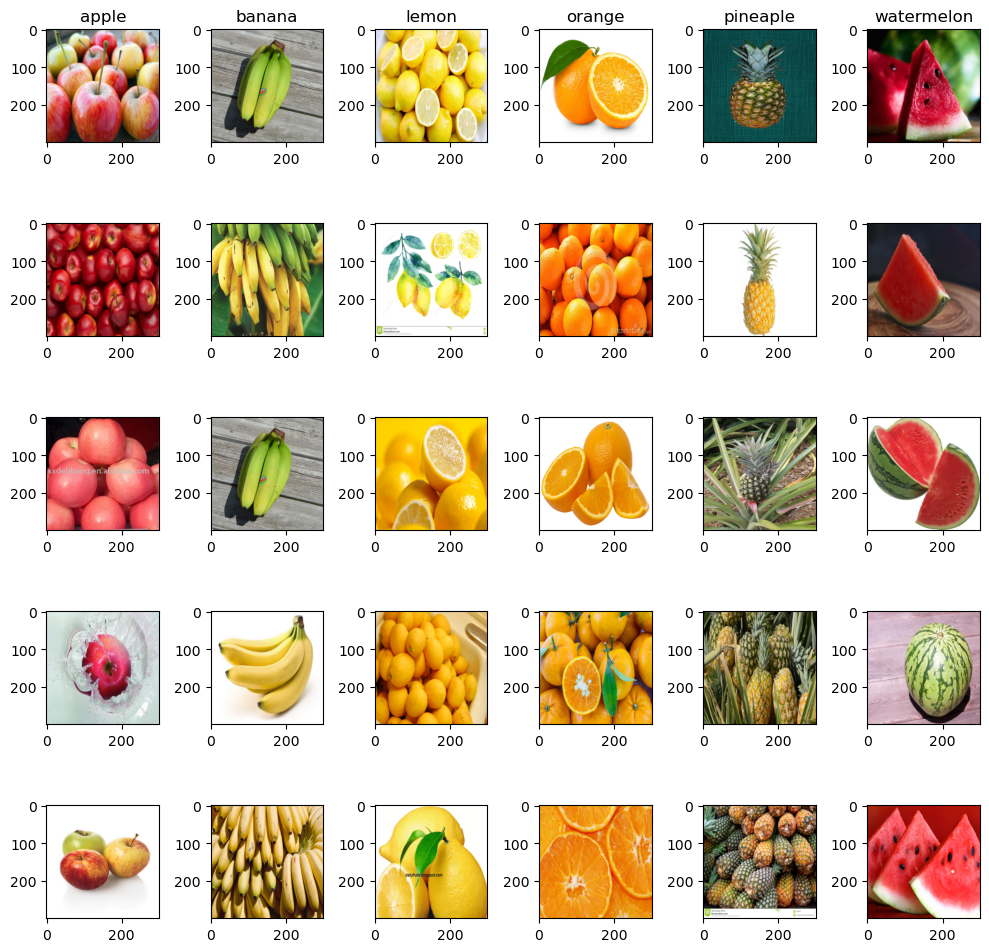

In [8]:
samples_per_class = 5

plt.figure(figsize=(10,10))
for y, cls in enumerate(classes):
    idx = np.random.choice(a = list_idex.idx[y][0], size = samples_per_class)
    for i, idx in enumerate(idx):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(img_data[idx])
        if i == 0:
            plt.title(cls)        
plt.tight_layout()            
plt.show()

In [9]:
# Image sampling:
num_image = len(img_data)

sample = np.random.choice(a = [0, 1], size = num_image, replace = True,
                           p = [0.7, 0.3])

X_train = img_data[sample == 0]
y_train = target_val[sample == 0]

X_test = img_data[sample == 1]
y_test = target_val[sample == 1]

In [10]:
# # As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (545, 300, 300, 3)
Training labels shape:  (545,)
Test data shape:  (231, 300, 300, 3)
Test labels shape:  (231,)


In [11]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
num_training = len(X_train)
num_test = len(X_test)
num_validation = num_training//5

val_idx = np.random.choice(a = np.where(sample == 1)[0], 
                           size = num_validation, replace = False)
X_val = img_data[val_idx]
y_val = target_val[val_idx]

# we can use this for development so our code runs faster.
num_dev = num_training//10
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

In [12]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1)) 
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (545, 270000)
Validation data shape:  (109, 270000)
Test data shape:  (231, 270000)
dev data shape:  (54, 270000)


[0.7496596  0.7337864  0.6811874  0.7535019  0.7375786  0.68372
 0.7515952  0.73659295 0.6816838  0.751408  ]


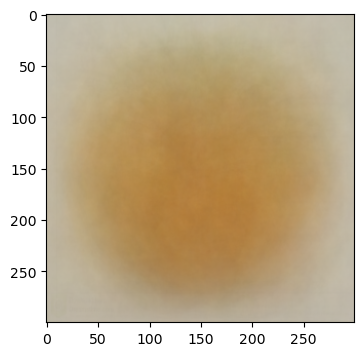

In [13]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((IMG_WIDTH, IMG_HEIGHT,3))) # visualize the mean image
plt.show()

In [14]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [15]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(545, 270001) (109, 270001) (231, 270001) (54, 270001)


## SVM Classifier

In [17]:
from cs231n.classifiers.linear_svm import svm_loss_naive
from cs231n.classifiers.linear_classifier import LinearSVM
import time

# # generate a random SVM weight matrix of small numbers
W = np.random.randn(X_dev.shape[1], 10) * 0.0001 

In [19]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [1e-8, 2e-7, 1e-7, 3e-5]
regularization_strengths = [0.5e4, 1e4, 2e4, 2.5e4, 3e4, 3.5e4, 4e4, 5e4, 6e4]
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.


for lr in learning_rates:
    for rs in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train, y_train, learning_rate=lr, reg=rs, num_iters=10)
        
        y_train_pred = svm.predict(X_train)
        y_val_pred = svm.predict(X_val)

        train_acc = np.mean(y_train == y_train_pred)
        val_acc = np.mean(y_val == y_val_pred)

        results[(lr, rs)] = (train_acc, val_acc)
        
        if val_acc > best_val:
            best_val = val_acc
            best_svm = svm
            
        print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, rs, train_acc, val_acc), flush=True)
            
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
      
print('best validation accuracy achieved during cross-validation: %f' % best_val, flush=True)

best_val_col = [x[1] for x in results.values()]
best_val_idx = best_val_col.index(best_val)

best_lr, best_rs = list(results.items())[best_val_idx][0]

print('best learning rate: %e' % best_lr)
print('best regularization strength): %e' % best_rs)

lr 1.000000e-08 reg 5.000000e+03 train accuracy: 0.051376 val accuracy: 0.009174
lr 1.000000e-08 reg 1.000000e+04 train accuracy: 0.113761 val accuracy: 0.110092
lr 1.000000e-08 reg 2.000000e+04 train accuracy: 0.104587 val accuracy: 0.073394
lr 1.000000e-08 reg 2.500000e+04 train accuracy: 0.108257 val accuracy: 0.146789
lr 1.000000e-08 reg 3.000000e+04 train accuracy: 0.132110 val accuracy: 0.100917
lr 1.000000e-08 reg 3.500000e+04 train accuracy: 0.163303 val accuracy: 0.146789
lr 1.000000e-08 reg 4.000000e+04 train accuracy: 0.045872 val accuracy: 0.027523
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.126606 val accuracy: 0.137615
lr 1.000000e-08 reg 6.000000e+04 train accuracy: 0.082569 val accuracy: 0.192661
lr 2.000000e-07 reg 5.000000e+03 train accuracy: 0.122936 val accuracy: 0.146789
lr 2.000000e-07 reg 1.000000e+04 train accuracy: 0.146789 val accuracy: 0.128440
lr 2.000000e-07 reg 2.000000e+04 train accuracy: 0.097248 val accuracy: 0.045872
lr 2.000000e-07 reg 2.500000

In [21]:
# Evaluate the best svm on test set
best_svm.train(X_train, y_train, learning_rate=best_lr, reg=best_rs, num_iters=500)
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

linear SVM on raw pixels final test set accuracy: 0.398268
